# PROJET Scraping et Analyse de données avec Python : WORLDMETERS

Ce projet est constitué de 2 parties, ce notebook représente la 2ème partie; la prémière était exclusivement liée au web scraping et a été excécutée sur vscode.

## Consigne: Dans cette deuxième partie, nous devez extraire les données historiques de population pour chaque pays sur une période donnée. Ensuite, nous utiliserons ces données pour créer un modèle de prédiction de la population future.

## Pour récupérer les données historiques de la population de chaque pays sur plusieurs années, il faut cliquer sur le pays en question situé dans le tableau initial, cela nous conduira vers un autre site ( par exemple: "https://www.worldometers.info/world-population/india-population/" , pour l'inde ) dans ce site, se trouve les données historique dont nous avons besoin et cela pour le pays concerné. Notre scraping devra donc un peu différer de celui de la partie 1 de notre projet. 

In [4]:
#################### Etape1: Voici Ce que que je vais essayer de faire
# Pour chaque ligne de la table, nous récupérons le nom du pays et le lien vers sa page individuelle.
# Le lien est stocké dans un dictionnaire avec le nom du pays comme clé et l'URL comme valeur.
# Cela nous permettra d'accéder aux données détaillées pour chaque pays en visitant leurs pages respectives.

In [5]:
import requests
from bs4 import BeautifulSoup

# URL cible
url = "https://www.worldometers.info/world-population/population-by-country/"

# En-têtes HTTP pour éviter d'être bloqué
HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36"
}

# Récupérer la page principale
response = requests.get(url, headers=HEADERS)

# Vérifier si la requête est réussie
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
else:
    raise Exception(f"Erreur de requête : {response.status_code}")

# Récupérer les liens vers les pages individuelles des pays
country_links = {}
table = soup.find("table")  # Trouver la table des pays
rows = table.find("tbody").find_all("tr")

for row in rows:
    cols = row.find_all("td")
    if len(cols) > 1:  # Ignore les lignes sans données
        country_name = cols[1].text.strip()  # Nom du pays
        country_url = "https://www.worldometers.info" + cols[1].find("a")["href"]
        country_links[country_name] = country_url

# Affichage des liens des pays
print(country_links)


{'India': 'https://www.worldometers.info/world-population/india-population/', 'China': 'https://www.worldometers.info/world-population/china-population/', 'United States': 'https://www.worldometers.info/world-population/us-population/', 'Indonesia': 'https://www.worldometers.info/world-population/indonesia-population/', 'Pakistan': 'https://www.worldometers.info/world-population/pakistan-population/', 'Nigeria': 'https://www.worldometers.info/world-population/nigeria-population/', 'Brazil': 'https://www.worldometers.info/world-population/brazil-population/', 'Bangladesh': 'https://www.worldometers.info/world-population/bangladesh-population/', 'Russia': 'https://www.worldometers.info/world-population/russia-population/', 'Ethiopia': 'https://www.worldometers.info/world-population/ethiopia-population/', 'Mexico': 'https://www.worldometers.info/world-population/mexico-population/', 'Japan': 'https://www.worldometers.info/world-population/japan-population/', 'Egypt': 'https://www.worldome

In [6]:
#################### Etape2: Voici Ce que que je vais essayer de faire

# Créer une fonction qui cible la section "Population historique" dans la page individuelle de chaque pays.
# Localiser dynamiquement la section pertinente en cherchant un <h2> avec le texte spécifique "Population of".
# Ensuite, nous parcourons la table de données qui suit pour récupérer les années et les populations correspondantes.
# Ces données seront utilisées pour analyser les tendances historiques et modéliser les prédictions futures.


In [8]:
def scrape_country_population_history(country_url):
   
    # Scrape les données historiques de population pour un pays donné.
    # Bien sur, je vais éviter d'utiliser le nom des classes pour rendre mon code robuste.
   
    response = requests.get(country_url, headers=HEADERS)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Trouver la balise <h2> (titre de la section)
    h2_tag = soup.find('h2', string=lambda text: text and 'Population of' in text)
    if not h2_tag:
        raise Exception("Titre non trouvé pour cette page.")
    
    # Trouver le div suivant immédiatement après ce <h2>
    div_tag = h2_tag.find_next('div')
    if not div_tag:
        raise Exception("Div après le titre non trouvée.")

    # Trouver la table qui suit ce <div>
    table = div_tag.find_next('table')
    if not table:
        raise Exception("Tableau historique non trouvé après le div.")

    # Récupérer toutes les lignes de la table
    rows = table.find("tbody").find_all("tr")
    history_data = []

    for row in rows:
        cols = row.find_all("td")
        if len(cols) > 1:
            year = cols[0].text.strip()  # Année
            population = cols[1].text.strip().replace(",", "")  # Population
            if population:
                history_data.append({"Year": year, "Population": int(population)})
    
    return history_data

# Exemple d'extraction pour l'Inde
india_url = country_links.get("India")
if india_url:
    india_history = scrape_country_population_history(india_url)
    print(india_history)  # Afficher les données historiques de population



[{'Year': '2024', 'Population': 1450935791}, {'Year': '2023', 'Population': 1438069596}, {'Year': '2022', 'Population': 1425423212}, {'Year': '2020', 'Population': 1402617695}, {'Year': '2015', 'Population': 1328024498}, {'Year': '2010', 'Population': 1243481564}, {'Year': '2005', 'Population': 1154676322}, {'Year': '2000', 'Population': 1057922733}, {'Year': '1995', 'Population': 960301044}, {'Year': '1990', 'Population': 864972221}, {'Year': '1985', 'Population': 772647793}, {'Year': '1980', 'Population': 687354025}, {'Year': '1975', 'Population': 611309535}, {'Year': '1970', 'Population': 545864268}, {'Year': '1965', 'Population': 490140146}, {'Year': '1960', 'Population': 435990338}, {'Year': '1955', 'Population': 387700887}]


In [9]:
#################### Etape3: Voici Ce que que je vais essayer de faire

# Je vais récupérer toutes les données historiques dont j'ai besoin et je vais mettre dans un fichier csv.

In [10]:
import pandas as pd

# Récupérer les données historiques pour tous les pays
all_data = []
for country, url in country_links.items():
    try:
        print(f"Récupération des données pour {country}...")
        history = scrape_country_population_history(url)
        for record in history:
            record['Country'] = country  # Ajouter le nom du pays à chaque enregistrement
        all_data.extend(history)
    except Exception as e:
        print(f"Erreur pour {country}: {str(e)}")

# Sauvegarder les données dans un fichier CSV
df = pd.DataFrame(all_data)
df.to_csv("historical_population_data.csv", index=False)


Récupération des données pour India...
Récupération des données pour China...
Récupération des données pour United States...
Récupération des données pour Indonesia...
Récupération des données pour Pakistan...
Récupération des données pour Nigeria...
Récupération des données pour Brazil...
Récupération des données pour Bangladesh...
Récupération des données pour Russia...
Récupération des données pour Ethiopia...
Récupération des données pour Mexico...
Récupération des données pour Japan...
Récupération des données pour Egypt...
Récupération des données pour Philippines...
Récupération des données pour DR Congo...
Récupération des données pour Vietnam...
Récupération des données pour Iran...
Récupération des données pour Turkey...
Récupération des données pour Germany...
Récupération des données pour Thailand...
Récupération des données pour United Kingdom...
Récupération des données pour Tanzania...
Récupération des données pour France...
Récupération des données pour South Africa...


# Le Scraping a été un succès, passons à l'analyse exploratoire et aux prédictions

In [22]:
import pandas as pd
df = pd.read_csv('historical_population_data.csv')

In [23]:
df.head()

,Year,Population,Country
0,2024,1450935791,India
1,2023,1438069596,India
2,2022,1425423212,India
3,2020,1402617695,India
4,2015,1328024498,India


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4145 entries, 0 to 4144
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        4145 non-null   int64 
 1   Population  4145 non-null   int64 
 2   Country     4145 non-null   object
dtypes: int64(2), object(1)
memory usage: 97.3+ KB


# Nous constatons qu'il n'ya pas de valeurs manquantes pour nos 3 variables, c'est très bien, par contre 'year' est du type object , nous allons le mettre sous le format 'int' et population au format float (facultatif)

In [6]:
df['Population'] = df['Population'].astype(float)

In [7]:
df['Year'] = df['Year'].astype(int)

In [8]:
print(df.dtypes)

Year            int32
Population    float64
Country        object
dtype: object


In [9]:
df.head()

,Year,Population,Country
0,2024,1.450936e+09,India
1,2023,1.438070e+09,India
2,2022,1.425423e+09,India
3,2020,1.402618e+09,India
4,2015,1.328024e+09,India


# Passons à la prédiction : Nous allons prédire les populations futures (par exemple, pour les 5 à 10 prochaines années).

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

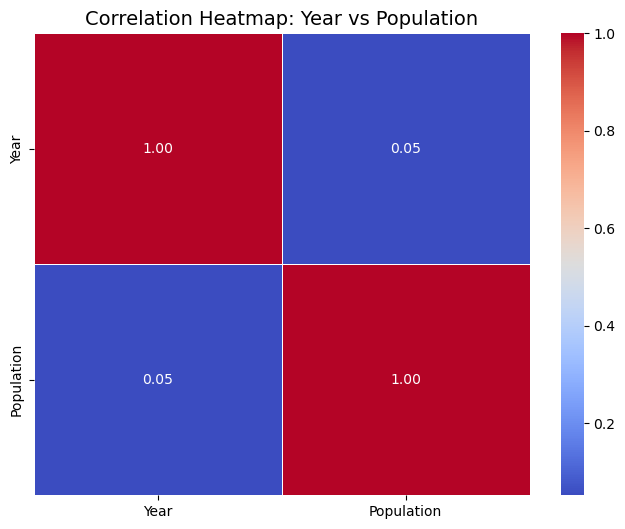

In [18]:
# Calculate the correlation matrix
correlation_matrix = df[['Year', 'Population']].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Year vs Population", fontsize=14)
plt.show()

## L'année et la population sont très peu corrélées, il ne serait donc pas judicieux d'utiliser une régression linéaire, nous utiliserons un modèle de forêts aléatoires; toutefois, nous ne nous attendons pas à des résultats très précis car à notre avis, il faut plus de variables pertinentes pour que le modèle puisse bien apprendre à prédire la population d'un pays.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# Renseignes le pays de ton choix (nous observerons le cas de l'inde) 
country_name = 'India'
df = df[df['Country'] == country_name]

In [27]:
# Variables indépendantes (X) et cible (y)
X = df[['Year']]
y = df['Population']

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  Entraîner un modèle Random Forest

In [28]:
# Instancier et entraîner le modèle
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Évaluer le modèle
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 1521407560806947.2
R² Score: 0.9912037870149346


 ## Prédire les populations futures

In [29]:
# Générer les années futures
future_years = pd.DataFrame({'Year': range(2020, 2030)})

# Prédire les populations futures
future_population = model.predict(future_years)

# Créer un DataFrame pour les prédictions futures
future_df = pd.DataFrame({
    'Country': country_name,
    'Year': future_years['Year'],
    'Population': future_population
})


## Visualisation des résultats

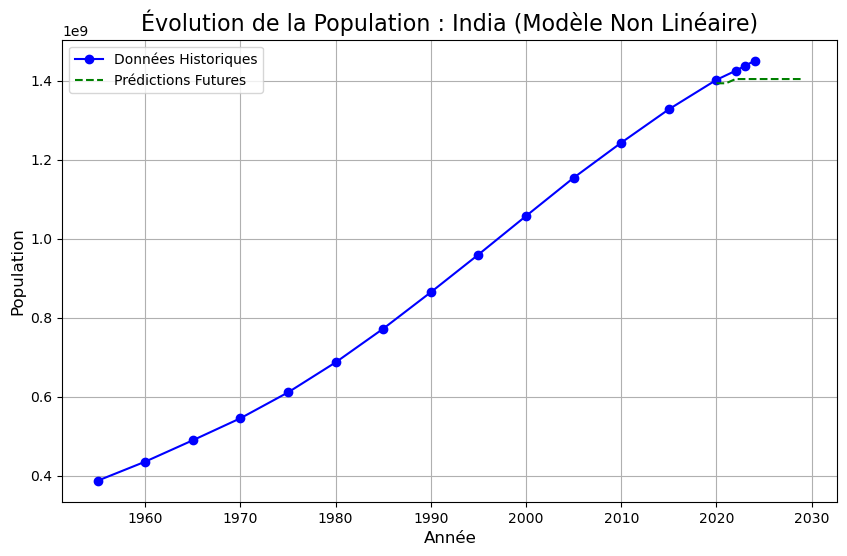

In [30]:
# Tracer les données historiques
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Population'], label='Données Historiques', marker='o', color='blue')

# Tracer les prédictions futures
plt.plot(future_df['Year'], future_df['Population'], label='Prédictions Futures', linestyle='--', color='green')

# Personnalisation du graphique
plt.title(f"Évolution de la Population : {country_name} (Modèle Non Linéaire)", fontsize=16)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()


## Ce résultat n'est pas mal mais il confirme bien nos craintes, en effet, pour des résultats plus précis, nous aurons besoin de plus de variables prédictives pertinentes.

## A présent nous allons évaluer les prédictions sur les données historiques

In [31]:
# Prédire sur les données historiques
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcul des métriques pour évaluer la précision
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Ensemble d'entraînement - MSE: {train_mse:.2f}, R²: {train_r2:.2f}")
print(f"Ensemble de test - MSE: {test_mse:.2f}, R²: {test_r2:.2f}")


Ensemble d'entraînement - MSE: 331943892240205.38, R²: 1.00
Ensemble de test - MSE: 1521407560806947.25, R²: 0.99


## Visualisons les tendances passées et les prédictions historiques

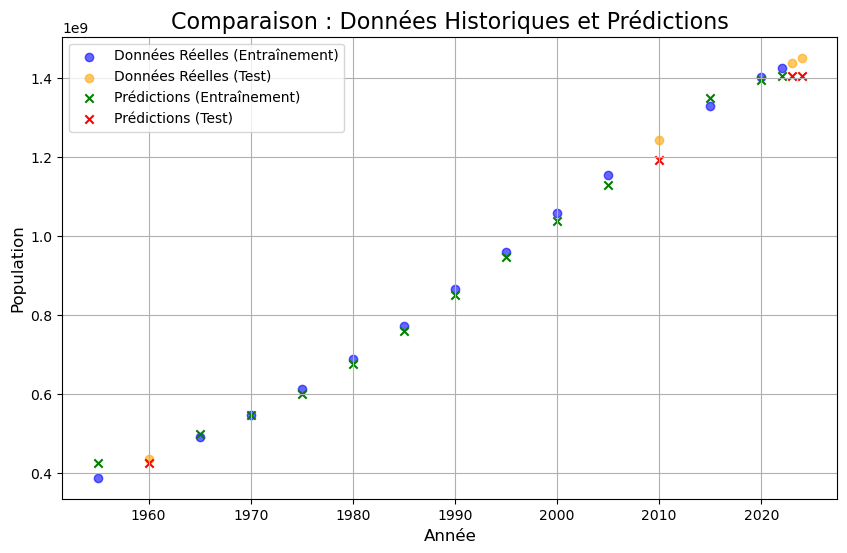

In [32]:
# Tracer les données réelles (historique)
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Données Réelles (Entraînement)', color='blue', alpha=0.6)
plt.scatter(X_test, y_test, label='Données Réelles (Test)', color='orange', alpha=0.6)

# Tracer les prédictions historiques
plt.scatter(X_train, y_train_pred, label='Prédictions (Entraînement)', color='green', marker='x')
plt.scatter(X_test, y_test_pred, label='Prédictions (Test)', color='red', marker='x')

# Personnalisation
plt.title("Comparaison : Données Historiques et Prédictions", fontsize=16)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()


## Comparaison visuelle avec les prédictions futures

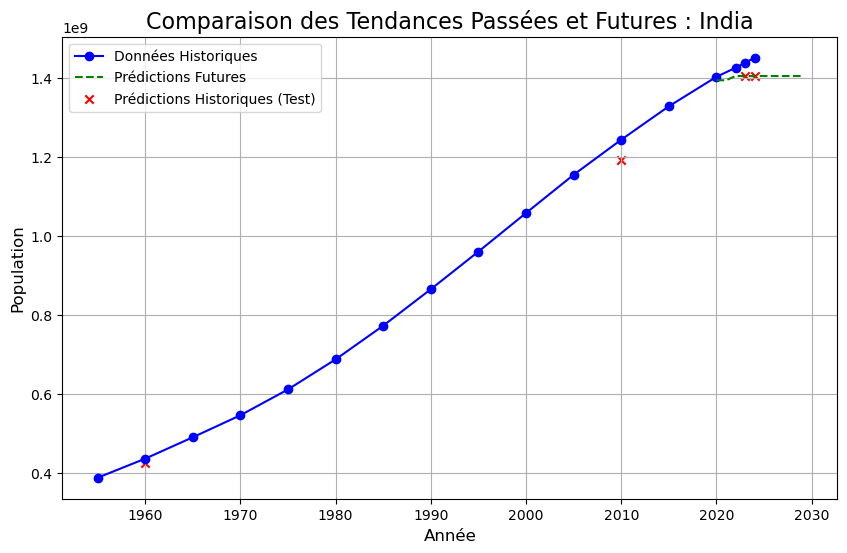

In [33]:
# Tracer les données historiques
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Population'], label='Données Historiques', marker='o', color='blue')

# Tracer les prédictions futures
plt.plot(future_df['Year'], future_df['Population'], label='Prédictions Futures', linestyle='--', color='green')

# Ajouter les prédictions historiques
plt.scatter(X_test, y_test_pred, label='Prédictions Historiques (Test)', color='red', marker='x')

# Personnalisation
plt.title(f"Comparaison des Tendances Passées et Futures : {country_name}", fontsize=16)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()


## Par ailleurs, si l'on souhaite améliorer notre modèle, nous pouvons inclure la densité, le taux de migrations, la superficie et meme le taux de croissance, les 3 premières informations(densité, ...) sont dans le dataset obtenu après scraping dans la première partie, Pour l'instant, nous nous contenterons de ces résultats afin de rester conformes au déroulé du projet, nous restons cependant ouvrts à tout retour ou suggestion.